In [26]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

__data overview__

In [27]:
raw_data = pd.read_csv('./iris.csv')

In [28]:
raw_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [29]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
round(raw_data.describe(), ndigits=2)

,sepal.length,sepal.width,petal.length,petal.width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [31]:
data = raw_data.copy(deep=True)

In [32]:
numcols = data.select_dtypes("float64").columns
objcols = data.select_dtypes("object").columns

In [33]:
data.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [34]:
data[data.duplicated()].index.tolist()

[142]

__finding and removing duplicate values__

In [35]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [36]:
def duplicate_drop():
    dup = data[data.duplicated()].index.tolist()
    data.drop(dup,axis=0, inplace=True)
    data.reset_index(drop=True)
    
    

In [37]:
duplicate_drop()

In [38]:
data.drop_duplicates(inplace=True)

In [39]:
data 

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


<AxesSubplot: xlabel='variety', ylabel='count'>

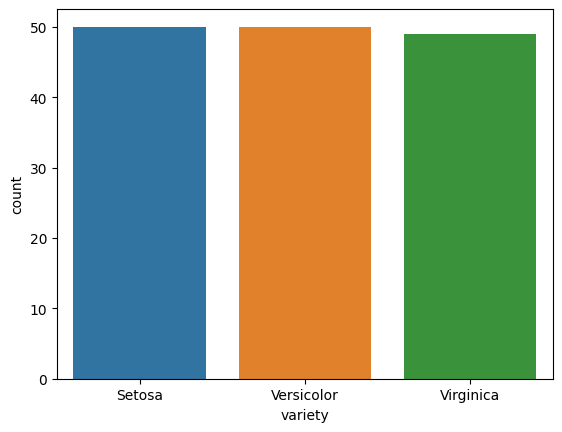

In [40]:
sns.countplot(data=data, x='variety')

In [41]:
#data['petal.length'].quantile(0.25)

1.6

In [42]:
#np.quantile(data['petal.length'],0.25)

1.6

__finding outliers__ 

<AxesSubplot: xlabel='petal.length'>

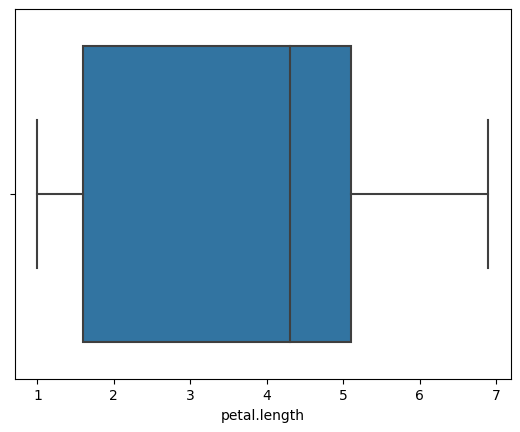

In [43]:
sns.boxplot(data=data, x='petal.length')

<AxesSubplot: xlabel='petal.width'>

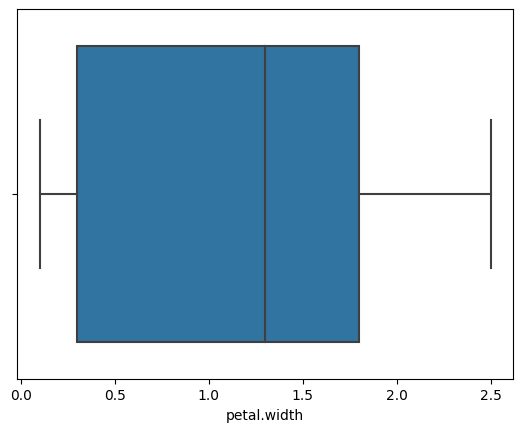

In [44]:
sns.boxplot(data=data, x='petal.width')

<AxesSubplot: xlabel='sepal.length'>

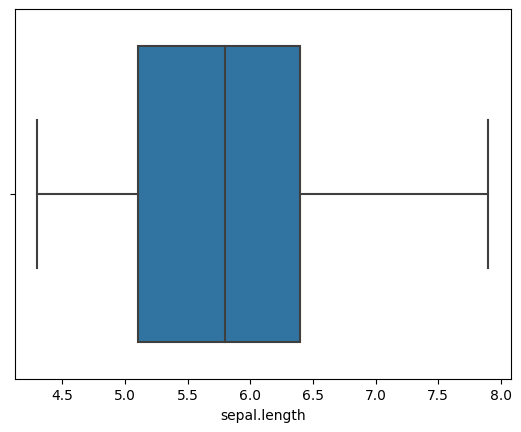

In [45]:
sns.boxplot(data=data, x='sepal.length')

<AxesSubplot: xlabel='sepal.width'>

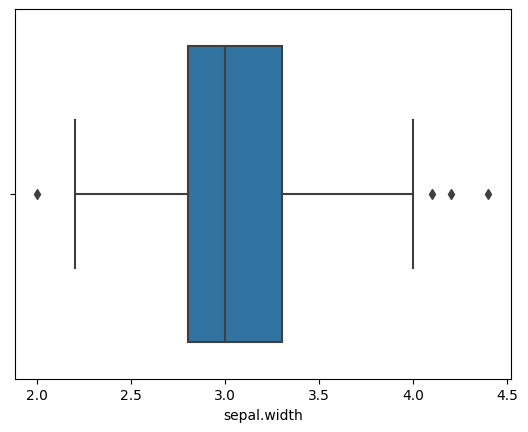

In [46]:
sns.boxplot(data=data, x='sepal.width')

In [47]:
def iqr_outliers(data):
    data = sorted(data)
    n = len(data)
    q1 = data[int(n * 0.25)]
    q3 = data[int(n * 0.75)]
    iqr = q3-q1
    lower_wisker = q1-1.5*iqr
    upper_wisker = q3+1.5*iqr
    
    outliers = []
    for index,value in enumerate(data):
        if value > upper_wisker or value < lower_wisker:
            outliers.append(index)
    return outliers
    
    

In [48]:
iqr_outliers(data["sepal.width"])

[0, 146, 147, 148]

KeyError: "[<AxesSubplot: xlabel='sepal.length'>] not found in axis"

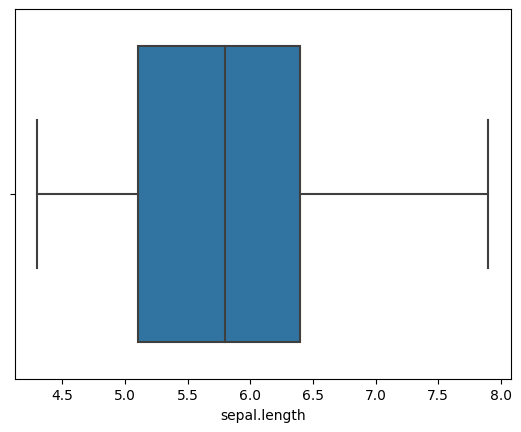

In [49]:
data.drop(sns.boxplot(data=data, x='sepal.length'),inplace=True)

In [50]:
objcols

Index(['variety'], dtype='object')

In [51]:
data['variety']

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 149, dtype: object

In [52]:
outliers = []
for column in data[numcols]:
    index = list(iqr_outliers(data[column]))
    outliers.extend(index)
outliers

[0, 146, 147, 148]

__encoding__

In [53]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['variety'] = encode.fit_transform(data.variety.values)

__splitting feature and target__

In [54]:
X = data.iloc[:,:-1]
y = data.loc[:,["variety"]]

In [55]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [73]:
y

,variety
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


__splitting into train and test data__

In [67]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=4)

In [68]:
ytest.shape

(45, 1)

__KNN Classifier__

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [70]:
trainacc = knn.score(xtrain,ytrain)
testacc = knn.score(xtest,ytest)

In [71]:
trainacc

0.9807692307692307

In [72]:
testacc

0.9777777777777777